In [20]:
import pandas as pd 
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df.job_posted_date)
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [25]:
df = df[df['job_title_short'] == 'Data Analyst']
df_expload = df.explode('job_skills')
skills_stat = df_expload.groupby('job_skills').agg(
    skill_count = ('job_skills','count'),
    median_salary = ('salary_year_avg','median')
)
skills_stat = skills_stat.sort_values(by='skill_count',ascending=False).head(10)

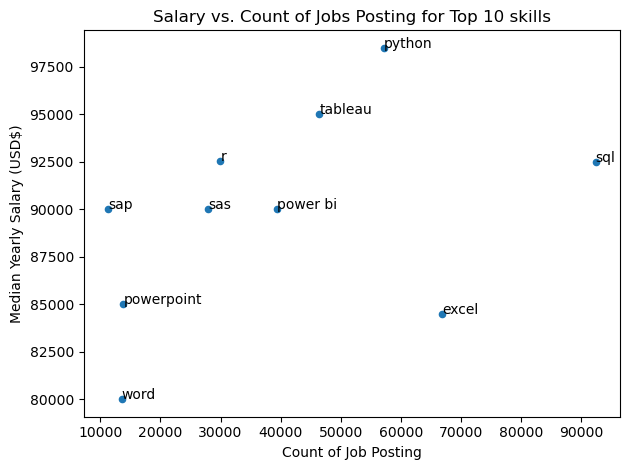

In [27]:
skills_stat.plot(kind='scatter',x='skill_count',y='median_salary')
plt.title('Salary vs. Count of Jobs Posting for Top 10 skills')
plt.ylabel('Median Yearly Salary (USD$)')
plt.xlabel('Count of Job Posting')
for i,txt in enumerate(skills_stat.index):
    plt.text(skills_stat['skill_count'].iloc[i],skills_stat['median_salary'].iloc[i],txt)
plt.tight_layout()
plt.show()